# 전처리

In [24]:
import pandas as pd
df_2020 = pd.read_excel('song_2020.xlsx')

In [25]:
del df_2020['Unnamed: 0']
df_2020.head()


,Id,Artist,Song
0,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,"[{'name': 'Still With You', 'track_number': 1,..."
1,6bmlMHgSheBauioMgKv2tn,Powfu,"[{'name': 'death bed (coffee for your head)', ..."
2,6bDWAcdtVR3WHz2xtiIPUi,Fujii Kaze,"[{'name': 'Nan-Nan', 'track_number': 1, 'id': ..."
3,4npEfmQ6YuiwW1GpUmaq3F,Ava Max,"[{'name': 'My Head & My Heart', 'track_number'..."
4,67MNhiAICFY6Pwc2YxCO0K,Elley Duhé,"[{'name': 'MIDDLE OF THE NIGHT', 'track_number..."


In [26]:
#url만 따로 빼기
df_2020['url'] = df_2020['Song'].str.split(':').str[-1].apply(lambda x: f"https:{x}")

In [27]:
#곡명만 따로 뺴기
import ast

def get_song_name(song_string):
    # 문자열 형태의 딕셔너리 리스트를 실제 딕셔너리 리스트로 변환
    song_list = ast.literal_eval(song_string)
    return song_list[0]['name']

df_2020['song_name'] = df_2020['Song'].apply(get_song_name)


In [28]:
#분석 편의를 위해 컬럼 순서 변경
df_2020 = df_2020[['song_name','Artist','url', 'Id', 'Song']]

In [29]:
#혹시 결측값있나 확인
df_2020['song_name'].isna().sum()

0

In [30]:
df_2020.head()

,song_name,Artist,url,Id,Song
0,Still With You,Jung Kook,https://open.spotify.com/track/0eFMbKCRw8KByXy...,6HaGTQPmzraVmaVxvz6EUc,"[{'name': 'Still With You', 'track_number': 1,..."
1,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,6bmlMHgSheBauioMgKv2tn,"[{'name': 'death bed (coffee for your head)', ..."
2,Nan-Nan,Fujii Kaze,https://open.spotify.com/track/26e8ujjSpBAHhIY...,6bDWAcdtVR3WHz2xtiIPUi,"[{'name': 'Nan-Nan', 'track_number': 1, 'id': ..."
3,My Head & My Heart,Ava Max,https://open.spotify.com/track/7DnAm9FOTWE3cUv...,4npEfmQ6YuiwW1GpUmaq3F,"[{'name': 'My Head & My Heart', 'track_number'..."
4,MIDDLE OF THE NIGHT,Elley Duhé,https://open.spotify.com/track/58HvfVOeJY7lUuC...,67MNhiAICFY6Pwc2YxCO0K,"[{'name': 'MIDDLE OF THE NIGHT', 'track_number..."


In [37]:
# Jupyter를 통해서 데이터 축소 없이 데이터를 확인하고 싶으면 실행(권장하지 않음ㅎ)
pd.set_option('display.max_colwidth', None)
df_2020['url'].head()


0    https://open.spotify.com/track/0eFMbKCRw8KByXyWBw8WO7'}]
1    https://open.spotify.com/track/7eJMfftS33KTjuF7lTsMCx'}]
2    https://open.spotify.com/track/26e8ujjSpBAHhIY2ymLUT1'}]
3    https://open.spotify.com/track/7DnAm9FOTWE3cUvso43HhI'}]
4    https://open.spotify.com/track/58HvfVOeJY7lUuCqF0m3ly'}]
Name: url, dtype: object

# 방법1) 크롤링(Using Genius API) -> 잘 작동되나 결측값 이슈로 채택X

## 2020데이터로 테스트

In [7]:
pip install lyricsgenius

Note: you may need to restart the kernel to use updated packages.


In [10]:
import lyricsgenius as lg

api_key = "1kXHoEF93L9gnXJa1dVGX1778TD_Xb8Q0HiQ9gH47E0u0eKN1ltWT0KIGuoDX4Y8" #본인 api_key
genius = lg.Genius(api_key)



In [11]:
genius = lg.Genius(api_key, skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"], remove_section_headers=True)

In [38]:
def get_lyrics(row):
    try:
        song = genius.search_song(row['song_name'], row['Artist'])
        return song.lyrics
    except:
        return None

df_2020['lyrics'] = df_2020.apply(get_lyrics, axis=1)


Searching for "Still With You" by Jung Kook...
Done.
Searching for "death bed (coffee for your head)" by Powfu...
Done.
Searching for "Nan-Nan" by Fujii Kaze...
Done.
Searching for "My Head & My Heart" by Ava Max...
Done.
Searching for "MIDDLE OF THE NIGHT" by Elley Duhé...
Done.
Searching for "Stuck with U (with Justin Bieber)" by Ariana Grande...
Done.
Searching for "DÁKITI" by Bad Bunny...
Done.
Searching for "Ashley" by Halsey...
Done.
Searching for "you broke me first" by Tate McRae...
Done.
Searching for "Dreamland" by Glass Animals...
Done.
Searching for "Shut up My Moms Calling" by Hotel Ugly...
Done.
Searching for "Rockstar Made" by Playboi Carti...
Done.
Searching for "My Head & My Heart" by Ava Max...
Done.
Searching for "Future Nostalgia" by Dua Lipa...
Done.
Searching for "shut up" by Ariana Grande...
Done.
Searching for "the 1" by Taylor Swift...
Done.
Searching for "the 1" by Taylor Swift...
Done.
Searching for "Alone Again" by The Weeknd...
Done.
Searching for "Future N

/var/folders/d1/k8w7ydl912db_c31zskh1q700000gn/T/ipykernel_10658/1703174855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df.apply(get_lyrics, axis=1)


In [40]:
df_2020.to_csv('df_2020')

## 2021,2022,2023 데이터 전처리

In [4]:
df_2021 = pd.read_excel('song_2021.xlsx')
df_2022 = pd.read_excel('song_2022.xlsx')
df_2023 = pd.read_excel('song_2023.xlsx')


In [5]:
del df_2021['Unnamed: 0']
del df_2022['Unnamed: 0']
del df_2023['Unnamed: 0']

In [6]:
#url만 따로 빼기
df_2021['url'] = df_2021['Song'].str.split(':').str[-1].apply(lambda x: f"https:{x}")
df_2022['url'] = df_2022['Song'].str.split(':').str[-1].apply(lambda x: f"https:{x}")
df_2023['url'] = df_2023['Song'].str.split(':').str[-1].apply(lambda x: f"https:{x}")

In [7]:
#곡명만 따로 뺴기
import ast

def get_song_name(song_string):
    # 문자열 형태의 딕셔너리 리스트를 실제 딕셔너리 리스트로 변환
    song_list = ast.literal_eval(song_string)
    return song_list[0]['name']

df_2021['song_name'] = df_2021['Song'].apply(get_song_name)
df_2022['song_name'] = df_2022['Song'].apply(get_song_name)
df_2023['song_name'] = df_2023['Song'].apply(get_song_name)


## 2023 

In [18]:
import time

def get_lyrics(row):
    try:
        song = genius.search_song(row['song_name'], row['Artist'])
        if song is not None:
            return song.lyrics
    except Exception as e:
        print(f"Error occurred with {row['song_name']} by {row['Artist']}: {e}")
    return None

df_2023['lyrics'] = df_2023.apply(lambda row: (time.sleep(1), get_lyrics(row))[1], axis=1)


Searching for "Seven (feat. Latto) (Clean Ver.)" by Jung Kook...
Done.
Searching for "Seven (feat. Latto) (Clean Ver.)" by Jung Kook...
Done.
Searching for "Cupid" by FIFTY FIFTY...
Done.
Searching for "Paint The Town Red" by Doja Cat...
Done.
Searching for "Barbie World (with Aqua) [From Barbie The Album]" by Nicki Minaj...
Done.
Searching for "Sprinter" by Dave...
Done.
Searching for "K-POP" by Travis Scott...
Done.
Searching for "New Jeans" by NewJeans...
Done.
Searching for "Rainy Days" by V...
Done.
Searching for "Face-off" by Jimin...
Done.
Searching for "Rainy Days" by V...
Done.
Searching for "Daylight" by David Kushner...
Done.
Searching for "Like Crazy" by Jimin...
Done.
Searching for "un x100to" by Grupo Frontera...
Done.
Searching for "Columbia" by Quevedo...
Done.
Searching for "Ella Baila Sola" by Eslabon Armado...
Done.
Searching for "vampire" by Olivia Rodrigo...
Done.
Searching for "HYAENA" by Travis Scott...
Done.
Searching for "obstáculo" by Tainy...
Done.
Searching 

## 2022

In [23]:
import time

def get_lyrics(row):
    try:
        song = genius.search_song(row['song_name'], row['Artist'])
        if song is not None:
            return song.lyrics
    except Exception as e:
        print(f"Error occurred with {row['song_name']} by {row['Artist']}: {e}")
    return None

df_2022['lyrics'] = df_2022.apply(lambda row: (time.sleep(1), get_lyrics(row))[1], axis=1)


Searching for "I'm Good (Blue)" by David Guetta...
Done.
Searching for "Until I Found You (with Em Beihold) - Em Beihold Version" by Stephen Sanchez...
No results found for: 'Until I Found You (with Em Beihold) - Em Beihold Version Stephen Sanchez'
Searching for "SOS" by SZA...
Done.
Searching for "Doja" by Central Cee...
Done.
Searching for "snowfall" by Øneheart...
Specified song does not contain lyrics. Rejecting.
Searching for "Romantic Homicide" by d4vd...
Done.
Searching for "People" by Libianca...
Done.
Searching for "As It Was" by Harry Styles...
Done.
Searching for "SOS" by SZA...
Done.
Searching for "Calm Down (with Selena Gomez)" by Rema...
Done.
Searching for "SNAP" by Rosa Linn...
Done.
Searching for "Ditto" by NewJeans...
Error occurred with Ditto by NewJeans: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for "In The Stars" by Benson Boone...
Done.
Searching for "La Bachata" by Manuel Turizo...
Done.
Search

# 방법2) 크롤링(Using selenium with Spotify URL)

In [ ]:
#리스트 정의 함수
#def convert_column_to_list(df, column_name):
#    url_list = df[column_name].tolist()
#    return url_list


In [44]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set your Spotify username and password
username = "airborn3586@gmail.com"
password = "Taskforce141??"

#Chrome webdriver
driver = webdriver.Chrome()

# Navigate to the Spotify login page
driver.get("https://accounts.spotify.com/ko/login?continue=https%3A%2F%2Fopen.spotify.com%2Ftrack%2F0eFMbKCRw8KByXyWBw8WO7")

time.sleep(5)

# Enter into login form
username_input = driver.find_element(By.ID, "login-username")
password_input = driver.find_element(By.ID, "login-password")
username_input.send_keys(username)
password_input.send_keys(password)

# Submit the login form and wait for page to load 
login_button = driver.find_element(By.XPATH, "//button[@id='login-button']")
login_button.click()

time.sleep(10)


def get_lyrics(driver, song_url):

    time.sleep(2) 
    
    driver.get(song_url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "EaTxqhHk6J4ecKHwpY5m"))) #location of lyrics

    lyrics_elements = driver.find_elements(By.XPATH, '//div[@class="EaTxqhHk6J4ecKHwpY5m"]//p')
    lyrics = [element.text for element in lyrics_elements]
    
    return "\n".join(lyrics)


df_2020['lyrics'] = ""

for index, row in df_2020.iterrows():
    url = row['url']
    lyrics = get_lyrics(driver, url)
    
    if lyrics:
        df_2020.at[index, 'lyrics'] = lyrics
    else:
        df_2020.at[index, 'lyrics'] = None


driver.quit()  # WebDriver Bye









TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x0000000100bae65c chromedriver + 4318812
1   chromedriver                        0x0000000100ba6d00 chromedriver + 4287744
2   chromedriver                        0x00000001007d87ec chromedriver + 296940
3   chromedriver                        0x0000000100816048 chromedriver + 548936
4   chromedriver                        0x000000010084ed28 chromedriver + 781608
5   chromedriver                        0x000000010080a178 chromedriver + 500088
6   chromedriver                        0x000000010080afc0 chromedriver + 503744
7   chromedriver                        0x0000000100b6ec40 chromedriver + 4058176
8   chromedriver                        0x0000000100b73160 chromedriver + 4075872
9   chromedriver                        0x0000000100b36e68 chromedriver + 3829352
10  chromedriver                        0x0000000100b73c4c chromedriver + 4078668
11  chromedriver                        0x0000000100b4bf08 chromedriver + 3915528
12  chromedriver                        0x0000000100b90140 chromedriver + 4194624
13  chromedriver                        0x0000000100b902c4 chromedriver + 4195012
14  chromedriver                        0x0000000100ba04d0 chromedriver + 4261072
15  libsystem_pthread.dylib             0x000000018894bfa8 _pthread_start + 148
16  libsystem_pthread.dylib             0x0000000188946da0 thread_start + 8


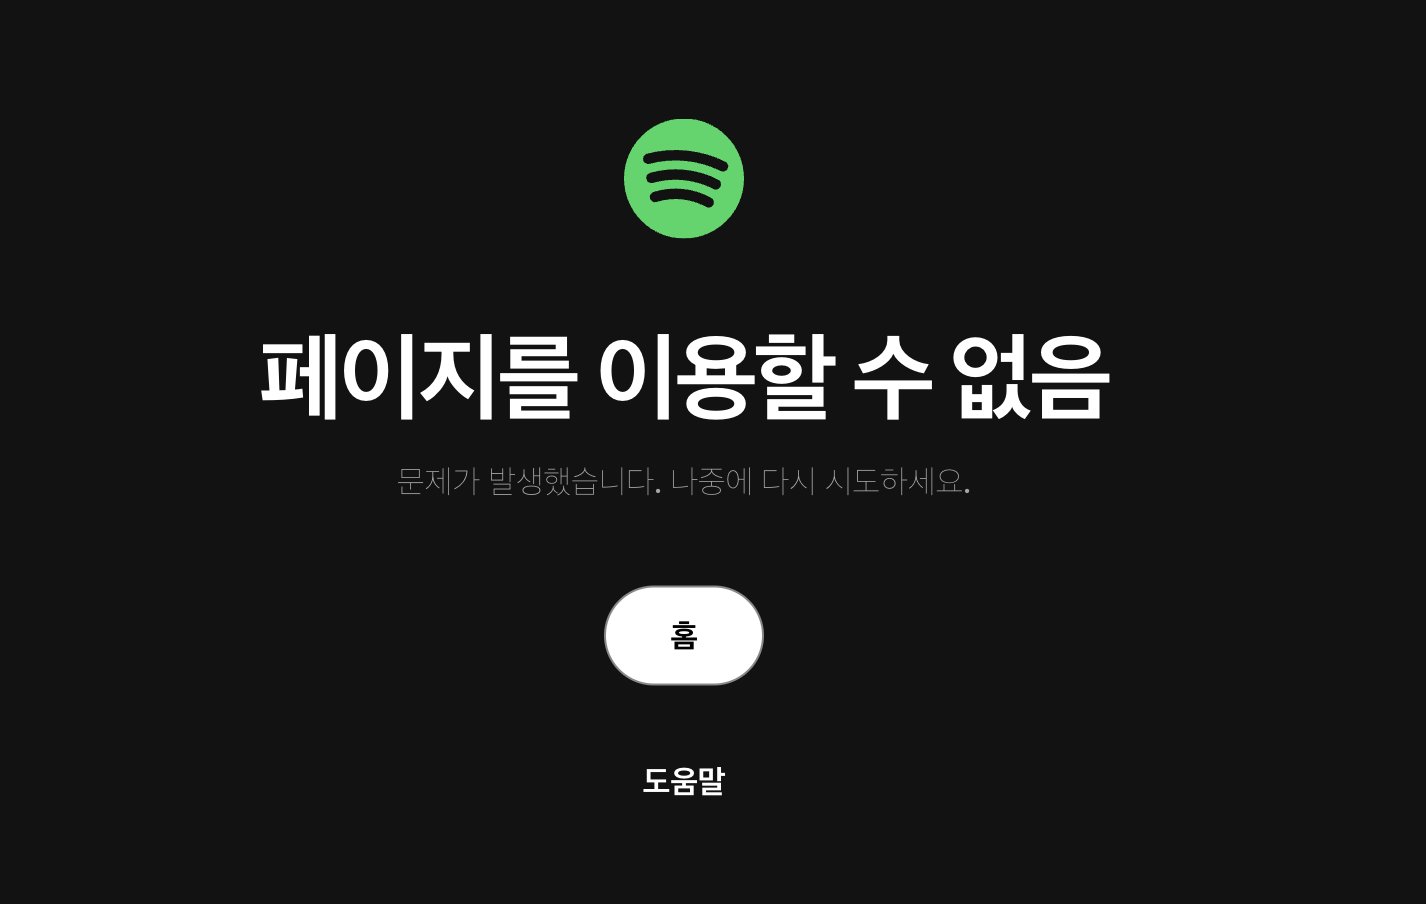

URL 하나로 테스트 했을 때는 문제가 없었으나 반복문을 입력하니 페이지에서 밴당한 것 같은 오류 발생